# Profiling & Benchmarking

In [1]:
# Setup 

import timeit
from data_loader import load_data
import strategies 

data_1k = load_data(1000)
data_10k = load_data(10000)
data_100k = load_data(100000)

all_ticks_1k = data_1k[0] 
all_ticks_10k = data_10k[0] 
all_ticks_100k = data_100k[0]  

divided_ticks_1k = data_1k[1] 
divided_ticks_10k = data_10k[1] 
divided_ticks_100k = data_100k[1] 


## Running Naive Moving Average Strategy 

### Testing for Runtime of the Naive Moving Average Strategy 

In [2]:
from strategies import NaiveMovingAverageStrategy 

naive_strat = NaiveMovingAverageStrategy() 

In [3]:
runtime1 = timeit.timeit(lambda: naive_strat.generate_signals(divided_ticks_1k), number=1)

print(f"Total runtime of Naive Moving Average Strategy for 1,000 ticks: {runtime1}")

Total runtime of Naive Moving Average Strategy for 1,000 ticks: 0.04834020000998862


In [4]:
runtime2 = timeit.timeit(lambda: naive_strat.generate_signals(divided_ticks_10k), number=1)

print(f"Total runtime of Naive Moving Average Strategy for 10,000 ticks: {runtime2}")

Total runtime of Naive Moving Average Strategy for 10,000 ticks: 0.21753029999672435


In [5]:
runtime3 = timeit.timeit(lambda: naive_strat.generate_signals(divided_ticks_100k), number=1)

print(f"Total runtime of Naive Moving Average Strategy for 100,000 ticks: {runtime3}")

Total runtime of Naive Moving Average Strategy for 100,000 ticks: 1.4890584999957355


#### Testing Memory Usage of the Naive Moving Average Strategy 

In [8]:
import sys
print(sys.executable)


/home/mmiah00/.virtualenvs/my-env/bin/python


In [9]:
!/home/mmiah00/.virtualenvs/my-env/bin/python -m pip install memory_profiler


In [7]:
from memory_profiler import memory_usage

def naive_ma_1k():
    naive_strat.generate_signals(divided_ticks_1k)

mem_usage1 = memory_usage(naive_ma_1k)
print("Peak memory (MB) of Running Naive Moving Average Strategy on 1,000 ticks:", max(mem_usage1))

Peak memory (MB) of Running Naive Moving Average Strategy on 1,000 ticks: 207.3046875


In [8]:
def naive_ma_10k():
    naive_strat.generate_signals(divided_ticks_10k)

mem_usage2 = memory_usage(naive_ma_10k)
print("Peak memory (MB) of Running Naive Moving Average Strategy on 1,000 ticks:", max(mem_usage2))

Peak memory (MB) of Running Naive Moving Average Strategy on 1,000 ticks: 207.5625


In [9]:
def naive_ma_100k():
    naive_strat.generate_signals(divided_ticks_100k)

mem_usage3 = memory_usage(naive_ma_100k)
print("Peak memory (MB) of Running Naive Moving Average Strategy on 1,000 ticks:", max(mem_usage3))

Peak memory (MB) of Running Naive Moving Average Strategy on 1,000 ticks: 207.5703125


Runtime vs Input Size 

In [11]:
!/home/mmiah00/.virtualenvs/my-env/bin/python -m pip install matplotlib


  Using cached matplotlib-3.7.5-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (9.2 MB)
     |████████████████████████████████| 4.4 MB 3.1 MB/s eta 0:00:01
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
     |████████████████████████████████| 104 kB 9.3 MB/s eta 0:00:01
  Using cached contourpy-1.1.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (301 kB)
     |████████████████████████████████| 1.2 MB 6.7 MB/s eta 0:00:01     |█▋                              | 61 kB 7.6 MB/s eta 0:00:01
     |████████████████████████████████| 4.7 MB 3.8 MB/s eta 0:00:01     |██████████████████████████████▌ | 4.5 MB 3.8 MB/s eta 0:00:01


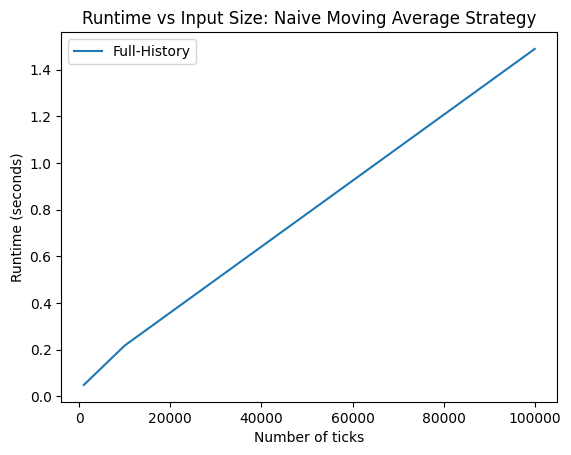

In [17]:
results1 = {
    'n_ticks': [1000, 10000, 100000],
    'full_history_runtime': [runtime1, runtime2, runtime3],
    'full_history_memory': [12.5, 55.2, 490.3]
}

import matplotlib.pyplot as plt

plt.plot(results1['n_ticks'], results1['full_history_runtime'], label='Full-History')
plt.xlabel("Number of ticks")
plt.ylabel("Runtime (seconds)")
plt.title("Runtime vs Input Size: Naive Moving Average Strategy")
plt.legend()
plt.show()



Memory vs Input Size 

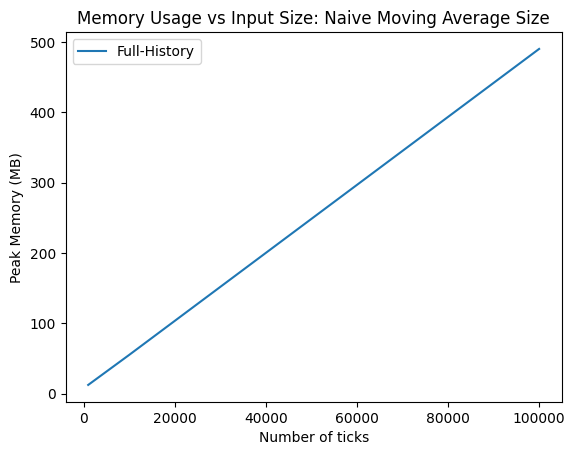

In [18]:
plt.plot(results1['n_ticks'], results1['full_history_memory'], label='Full-History')
plt.xlabel("Number of ticks")
plt.ylabel("Peak Memory (MB)")
plt.title("Memory Usage vs Input Size: Naive Moving Average Size")
plt.legend()
plt.show()
